In [1]:
# Install required libraries
%pip install pandas matplotlib seaborn scikit-learn -q


In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df_data = pd.read_csv('/day.csv')

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
df_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
df_data.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
df_data.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


# New Section

In [16]:
category_variable_name_dict = {
   'season': {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'},
   'yr' : {0: '2018', 1: '2019'},
   'mnth': { 1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7 : "July", 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"},
   'holiday': {0: 'Holiday', 1: 'Not Holiday'},
   'weekday': {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'},
   'workingday': {0: 'Working Day', 1: 'Not Working Day'},
   'weathersit': {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                  3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'}
}

for category in category_variable_name_dict:
   df_data[category + '_name'] = df_data[category].map(category_variable_name_dict[category])

print(list(df_data.columns))


['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_name', 'yr_name', 'mnth_name', 'holiday_name', 'weekday_name', 'workingday_name', 'weathersit_name']


In [17]:
#Univariate analysis

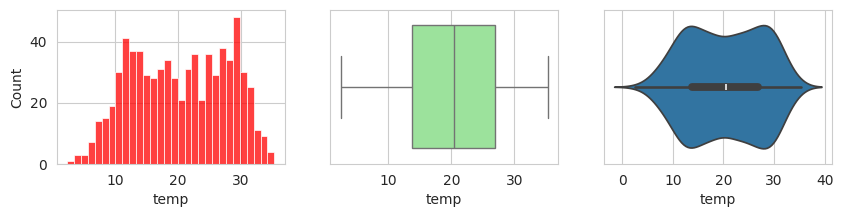

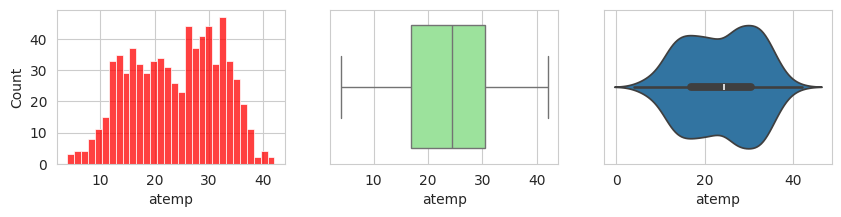

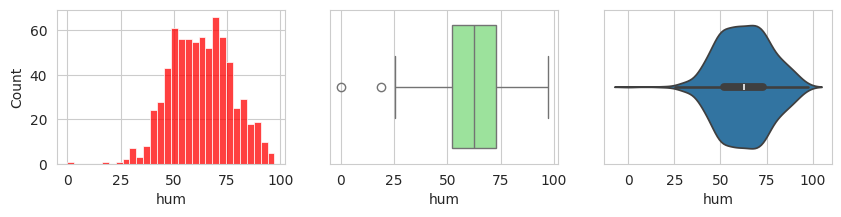

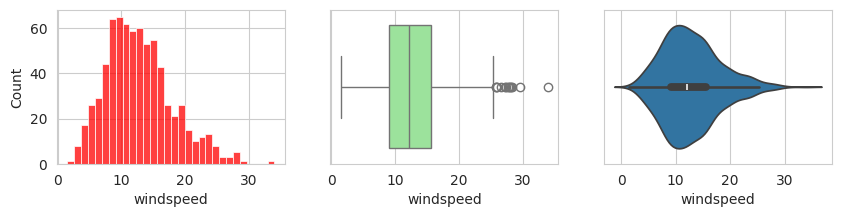

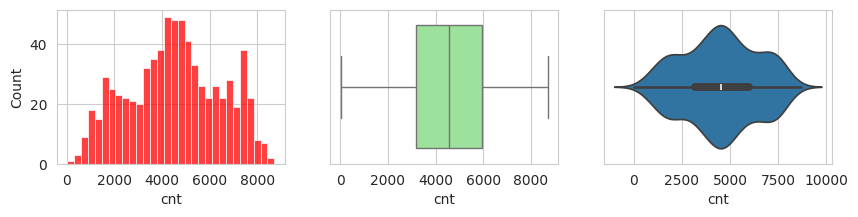

In [19]:
sns.set_style('whitegrid')
numerical_cols=['temp','atemp','hum','windspeed']
categorical_cols=['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

for column in numerical_cols + ['cnt']:
    fig, axs = plt.subplots(ncols = 3, figsize=(10, 2))
    sns.histplot(df_data, x=column, kde = False, color ='red', bins = 30, ax=axs[0])
    sns.boxplot(df_data, x=column, color ='lightgreen', ax=axs[1])
    sns.violinplot(data=df_data, x=column, ax=axs[2])

In [ ]:
#Univariate Analysis: Categorical Variables


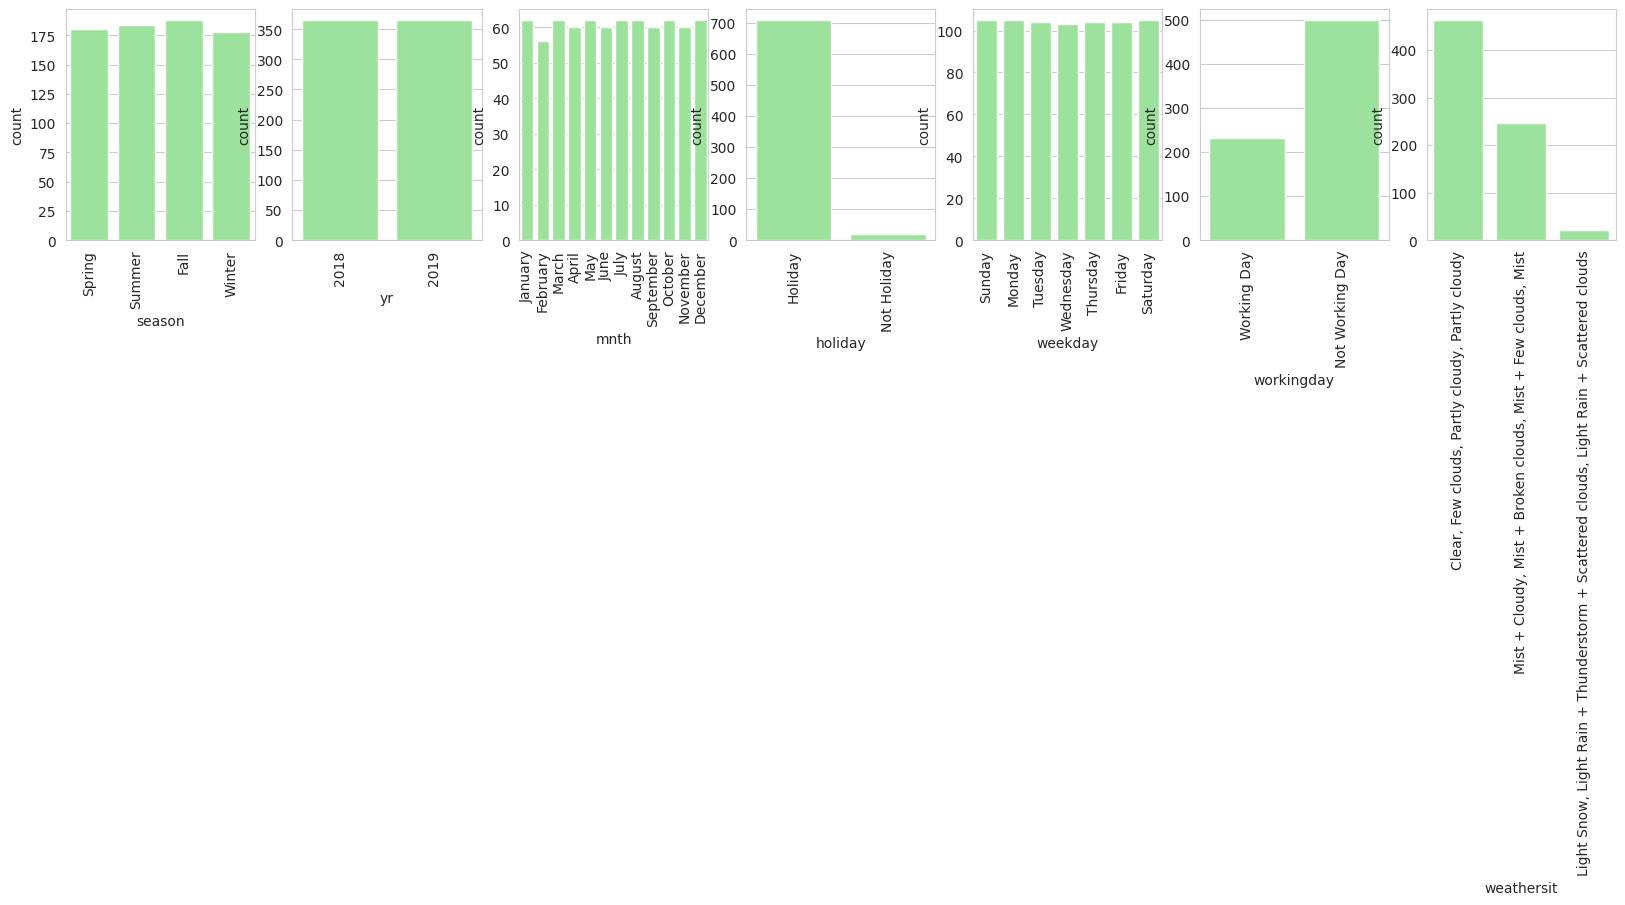

In [23]:

fig, axs = plt.subplots(ncols = 7, figsize=(20, 3))
for i, column in enumerate(categorical_cols):
    g = sns.countplot(df_data, x=column, color='lightgreen', ax=axs[i])
    g.set_xticklabels(labels=category_variable_name_dict[column].values(), rotation=90)

#Bivariate Analysis


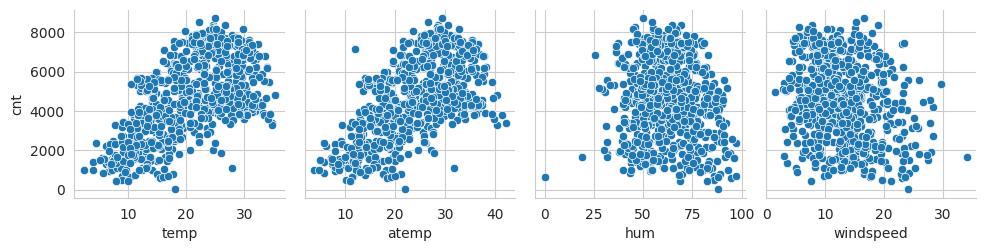

In [24]:
sns.pairplot(data=df_data,y_vars=['cnt'],x_vars=['temp','atemp','hum','windspeed'])

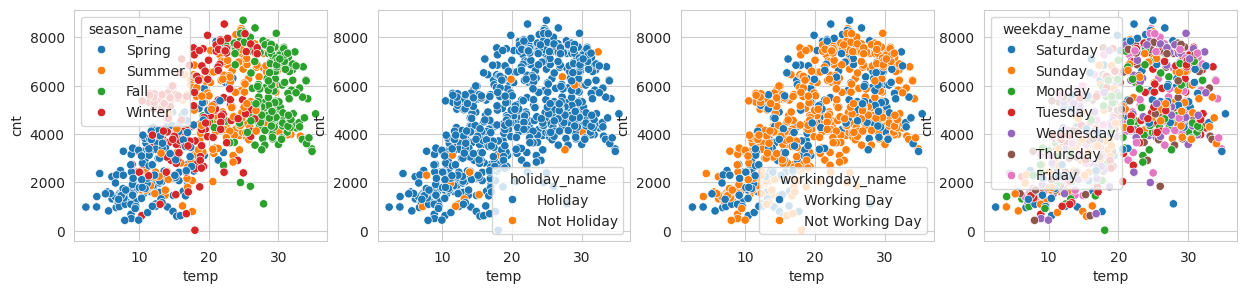

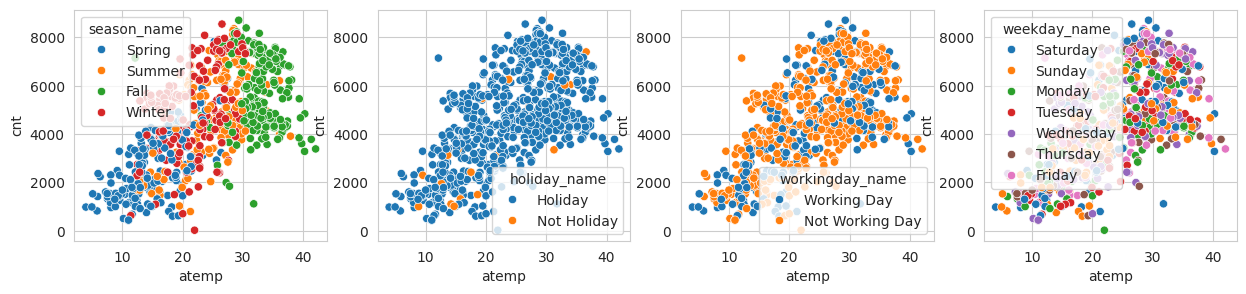

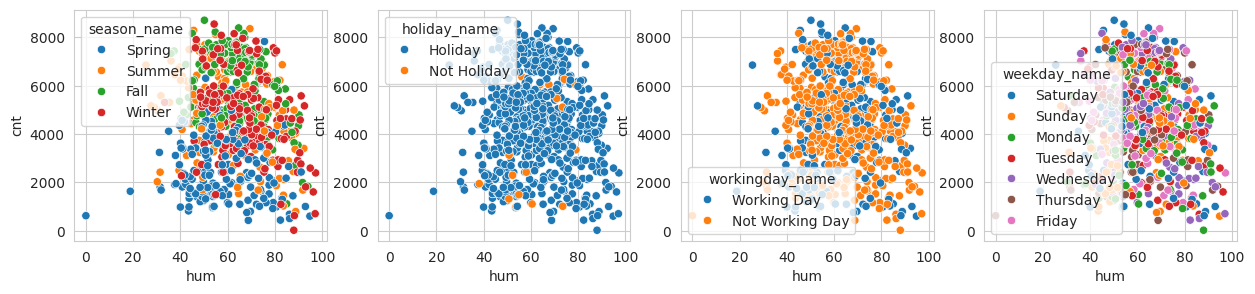

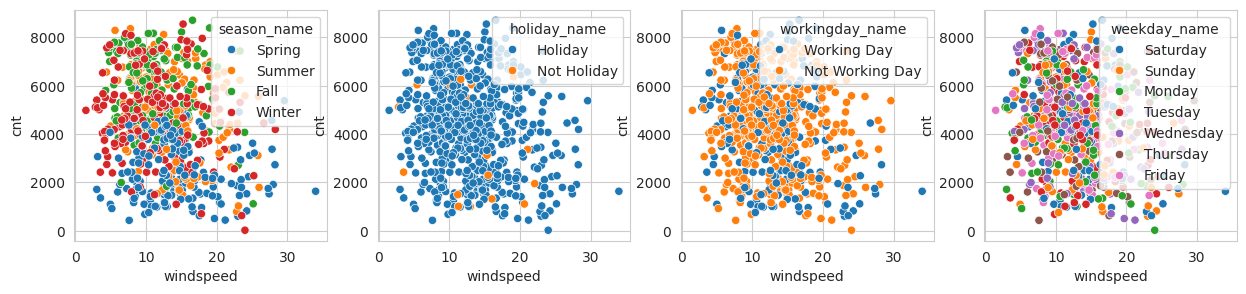

In [25]:
for i, column in enumerate(numerical_cols):
    fig, axs = plt.subplots(ncols=4, figsize=(15, 3))
    sns.scatterplot(df_data, x=column, y='cnt',  hue="season_name",  ax=axs[0])
    sns.scatterplot(df_data, x=column, y='cnt',  hue="holiday_name",  ax=axs[1])
    sns.scatterplot(df_data, x=column, y='cnt',  hue="workingday_name",  ax=axs[2])
    sns.scatterplot(df_data, x=column, y='cnt',  hue="weekday_name",  ax=axs[3])

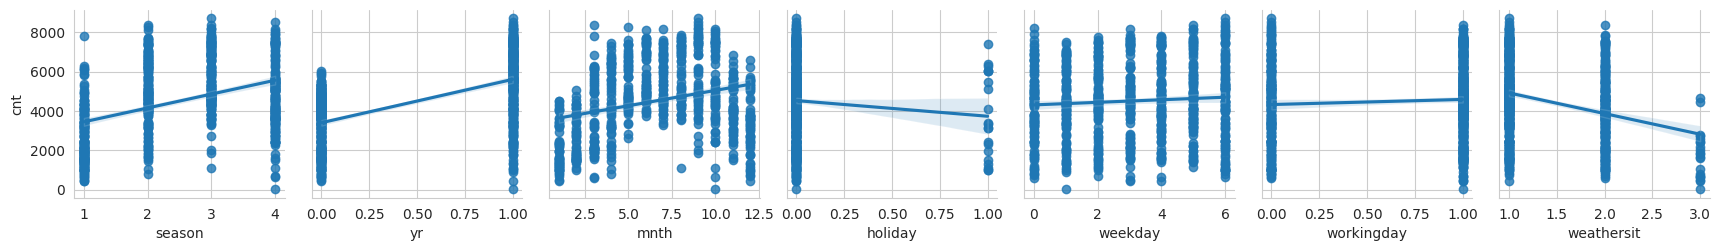

In [26]:
sns.pairplot(data=df_data, y_vars=['cnt'],x_vars=['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit'],kind="reg")

# Heatmap to check for multicollinearity and relationship between two variables



<Axes: >

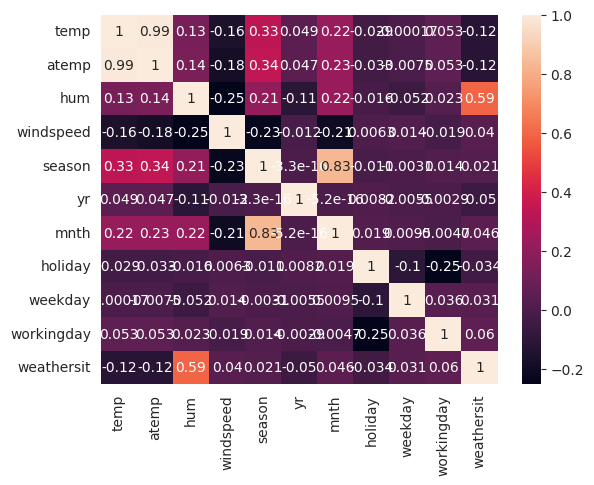

In [28]:
sns.heatmap(df_data[numerical_cols + categorical_cols].corr(), annot=True)


#Introdce Day of Year feature from dteday feature.

In [29]:
df_data['dteday'] = pd.to_datetime(df_data['dteday'], format='%m-%d-%Y', errors='coerce')
df_data['day_of_year'] = df_data['dteday'].dt.dayofyear

Scaling & Encoding Categorical Variables and
Standardize numerical features by removing the mean and scaling to unit variance.

Encode Categorical Variable through One-hot, Encoding

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

column_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['day_of_year', 'yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']),
         ('cat', categorical_transformer, ['season', 'weekday', 'weathersit'])]
    )

Feature Selection


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

y = df_data['cnt']
X = df_data.drop('cnt', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

column_transformer.set_output(transform='pandas')

# fit the column transformer to the training data
column_transformer.fit(X_train)

# apply the pipeline to the training and test data
X_train_ = column_transformer.transform(X_train)
X_test_ = column_transformer.transform(X_test)

print(X_train_.head(5))

     num__day_of_year   num__yr  num__mnth  num__holiday  num__workingday  \
498         -0.061817  1.020763  -0.488555     -0.178331         0.686318   
435          2.546830  1.020763  -1.062631     -0.178331         0.686318   
253          2.187016 -0.979659   0.659598     -0.178331        -1.457050   
156         -0.151771 -0.979659  -0.201517     -0.178331         0.686318   
227         -0.061817 -0.979659   0.372560     -0.178331         0.686318   

     num__temp  num__atemp  num__hum  num__windspeed  cat__season_1  ...  \
498   0.427659    0.466172  1.134820        0.336641            0.0  ...   
435  -0.144121   -0.077939 -1.009430        0.272192            1.0  ...   
253   0.856497    0.823633  0.593554       -0.927198            0.0  ...   
156   0.990509    0.899723 -0.218348       -0.838634            0.0  ...   
227   1.111120    1.044198 -0.372999        0.642602            0.0  ...   

     cat__weekday_0  cat__weekday_1  cat__weekday_2  cat__weekday_3  \
498      

In [34]:
lm = LinearRegression()
lm.fit(X_train_, y_train)
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train_, y_train)

In [35]:
list(zip(X_train_.columns,rfe.support_,rfe.ranking_))


[('num__day_of_year', False, 13),
 ('num__yr', True, 1),
 ('num__mnth', False, 11),
 ('num__holiday', False, 6),
 ('num__workingday', False, 12),
 ('num__temp', True, 1),
 ('num__atemp', True, 1),
 ('num__hum', False, 5),
 ('num__windspeed', False, 4),
 ('cat__season_1', True, 1),
 ('cat__season_2', False, 3),
 ('cat__season_3', False, 10),
 ('cat__season_4', True, 1),
 ('cat__weekday_0', True, 1),
 ('cat__weekday_1', True, 1),
 ('cat__weekday_2', False, 2),
 ('cat__weekday_3', False, 9),
 ('cat__weekday_4', False, 8),
 ('cat__weekday_5', False, 14),
 ('cat__weekday_6', False, 7),
 ('cat__weathersit_1', True, 1),
 ('cat__weathersit_2', True, 1),
 ('cat__weathersit_3', True, 1)]

In [36]:

X_train_.columns[rfe.support_]

Index(['num__yr', 'num__temp', 'num__atemp', 'cat__season_1', 'cat__season_4',
       'cat__weekday_0', 'cat__weekday_1', 'cat__weathersit_1',
       'cat__weathersit_2', 'cat__weathersit_3'],
      dtype='object')

In [37]:
X_train_rfe = X_train_[X_train_.columns[rfe.support_]]
X_train_rfe.head()

,num__yr,num__temp,num__atemp,cat__season_1,cat__season_4,cat__weekday_0,cat__weekday_1,cat__weathersit_1,cat__weathersit_2,cat__weathersit_3
498,1.020763,0.427659,0.466172,0.0,0.0,0.0,1.0,0.0,1.0,0.0
435,1.020763,-0.144121,-0.077939,1.0,0.0,0.0,1.0,1.0,0.0,0.0
253,-0.979659,0.856497,0.823633,0.0,0.0,1.0,0.0,1.0,0.0,0.0
156,-0.979659,0.990509,0.899723,0.0,0.0,0.0,1.0,1.0,0.0,0.0
227,-0.979659,1.111120,1.044198,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF             = pd.DataFrame()
VIF['feature']  = X_train_.columns
VIF['VIF']      = [variance_inflation_factor(X_train_.values, i) for i in range(X_train_.shape[1])]
# take a look
VIF

,feature,VIF
0,num__day_of_year,1.013674
1,num__yr,1.033786
2,num__mnth,3.141143
3,num__holiday,inf
4,num__workingday,inf
5,num__temp,64.961320
6,num__atemp,60.580813
7,num__hum,2.109954
8,num__windspeed,1.262291
9,cat__season_1,inf


In [40]:
X_train_new = X_train_.drop(['num__atemp'], axis=1)

VIF            = pd.DataFrame()
VIF['feature'] = X_train_new.columns
VIF['VIF']     = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
VIF

,feature,VIF
0,num__day_of_year,1.013600
1,num__yr,1.032806
2,num__mnth,3.141126
3,num__holiday,inf
4,num__workingday,inf
5,num__temp,3.492784
6,num__hum,2.103736
7,num__windspeed,1.211876
8,cat__season_1,inf
9,cat__season_2,inf


Build Model

In [41]:
model = LinearRegression()
model.fit(X_train_, y_train)

y_test_pred = model.predict(X_test_)

print("model score: %.3f" % model.score(X_test_, y_test))

model score: 0.861


Model evolution

In [42]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

0.8606877718112111

In [43]:
print(list(zip(model.coef_, X_train_.columns)))
import numpy as np
coefficients = pd.concat([pd.DataFrame(X_train_.columns, columns=['feature']),pd.DataFrame(np.transpose(model.coef_), columns=['coefficients'])], axis = 1)
print(coefficients.sort_values('coefficients', ascending=False))

[(29.557955275646012, 'num__day_of_year'), (979.7324153842351, 'num__yr'), (-52.07209775389951, 'num__mnth'), (-111.3150684356957, 'num__holiday'), (30.09923617214652, 'num__workingday'), (694.8464363645373, 'num__temp'), (219.85164578591656, 'num__atemp'), (-132.8959568036633, 'num__hum'), (-189.83860041057932, 'num__windspeed'), (-945.6899143526236, 'cat__season_1'), (222.7539635805854, 'cat__season_2'), (61.88344931746076, 'cat__season_3'), (661.052501454578, 'cat__season_4'), (-221.5022639915499, 'cat__weekday_0'), (-123.3366598372063, 'cat__weekday_1'), (-79.04270594198219, 'cat__weekday_2'), (90.29857863337395, 'cat__weekday_3'), (97.17674081378823, 'cat__weekday_4'), (9.707870530982797, 'cat__weekday_5'), (226.6984397925933, 'cat__weekday_6'), (811.9030687175987, 'cat__weathersit_1'), (356.66258191771055, 'cat__weathersit_2'), (-1168.5656506353098, 'cat__weathersit_3')]
              feature  coefficients
1             num__yr    979.732415
20  cat__weathersit_1    811.903069
5 